# Module 3 Project: Hypothesis Testing (Northwind Database)

## Evan Okin

Start by importing the data from SQL database into Python.

In [1]:
import sqlite3
conn = sqlite3.connect('Northwind_small.db')
c = conn.cursor()
c

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.Connection('Northwind_small.sqlite')
c = conn.cursor()

Observe all tables that we have access to in the database, so we can see what data we have.

In [3]:
tables = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
tables = [i[0] for i in tables]
list(tables)

['Employee',
 'Category',
 'Customer',
 'Shipper',
 'Supplier',
 'Order',
 'Product',
 'OrderDetail',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Region',
 'Territory',
 'EmployeeTerritory']

"Product" Table:

In [4]:
c.execute("""SELECT * FROM Product;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

77


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


"Supplier" Table:

In [5]:
c.execute("""SELECT * FROM Supplier;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

29


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None


"Region" Table:

In [6]:
c.execute("""SELECT * FROM Region;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

4


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern


"OrderDetail" Table:

In [7]:
c.execute("""SELECT * FROM OrderDetail;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

2155


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0


"Category" Table:

In [8]:
c.execute("""SELECT * FROM Category;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

8


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"


"Employee" Table:

In [9]:
c.execute("""SELECT * FROM Employee;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

9


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp


"EmployeeTerritory" Table:

In [10]:
c.execute("""SELECT * FROM EmployeeTerritory;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

49


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581


"Territory" Table:

In [11]:
c.execute("""SELECT * FROM Territory;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

53


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1


"Customer" Table:

In [12]:
c.execute("""SELECT * FROM Customer;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

91


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None


"Shipper" Table:

In [13]:
c.execute("""SELECT * FROM Shipper;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(10)

3


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


"OrderDetail" Table:

This table has discount statistics, which will allow us to test if discount amount has a statistically significant effect on the quantity of a product in an order. This is the critical table for the first portion of our analysis.

In [14]:
c.execute("""SELECT * FROM OrderDetail;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

2155


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0


In [15]:
df.tail(3)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00
2154,11077/77,11077,77,13.00,2,0.00


Explore the "Discount" column:

In [16]:
df['Discount'].count()

2155

There are 2155 data points to assess.

In [17]:
df['Discount'].value_counts(normalize=True)

0.00    0.611137
0.05    0.085847
0.10    0.080278
0.20    0.074710
0.15    0.072854
0.25    0.071462
0.03    0.001392
0.02    0.000928
0.01    0.000464
0.04    0.000464
0.06    0.000464
Name: Discount, dtype: float64

61% of orders do not have any discounts, which means that 39% of orders do have discounts (of at least 1 cent).

In [18]:
df['Discount'].value_counts(normalize=True).sort_values(ascending=False).head(4)

0.00    0.611137
0.05    0.085847
0.10    0.080278
0.20    0.074710
Name: Discount, dtype: float64

The most common discount amounts are are .05, .10, and .20 cent discounts.

Explore the Quantity purchased column, and see if there's any correlation with Discount:

In [19]:
df['Quantity'].value_counts(normalize=True)

20     0.116937
30     0.090023
10     0.083991
15     0.078422
40     0.052436
12     0.042691
6      0.040371
25     0.037123
50     0.034803
35     0.032947
5      0.031090
24     0.026914
60     0.026914
4      0.025522
2      0.024130
21     0.023202
8      0.023202
18     0.021810
3      0.021346
14     0.016705
16     0.016241
9      0.013921
28     0.013457
70     0.012993
7      0.010673
36     0.009745
42     0.008817
1      0.007889
80     0.007425
45     0.006497
100    0.004640
55     0.004176
120    0.003712
65     0.003712
49     0.003248
48     0.002320
32     0.002320
44     0.001856
90     0.001856
13     0.001392
77     0.001392
110    0.001392
56     0.001392
84     0.000928
11     0.000928
27     0.000928
33     0.000928
39     0.000928
130    0.000928
63     0.000464
66     0.000464
22     0.000464
52     0.000464
54     0.000464
91     0.000464
Name: Quantity, dtype: float64

In [20]:
df.corr()

,OrderId,ProductId,UnitPrice,Quantity,Discount
OrderId,1.000000,-0.057118,0.061743,-0.016260,-0.002041
ProductId,-0.057118,1.000000,-0.019956,0.011932,-0.037659
UnitPrice,0.061743,-0.019956,1.000000,0.007366,-0.011166
Quantity,-0.016260,0.011932,0.007366,1.000000,0.128577
Discount,-0.002041,-0.037659,-0.011166,0.128577,1.000000


The correlation matrix above shows a positive correlation (~.13) between Discount and Quantity purchased.

In [21]:
df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


Text(0, 0.5, 'Quantity Purchased')

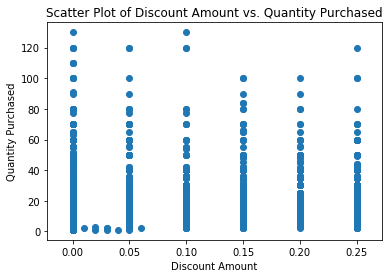

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.Discount,df.Quantity)
plt.title('Scatter Plot of Discount Amount vs. Quantity Purchased')
plt.xlabel('Discount Amount')
plt.ylabel('Quantity Purchased')

We will need to perform further tests to impact the significance of discount on quantity purchased (too hard to eyeball), but we do know that there's a positive correlation of roughly 0.13.

In [23]:
len(df)

2155

In [24]:
len(df.loc[df['Discount']==0])

1317

Check to make sure that the data is clean and has no missing values:

In [25]:
df.isna().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

Create a dataframe with orders that have no discount:

In [26]:
No_Discounts=df.loc[df['Discount']==0]
No_Discounts.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.0
mean,10662.791951,41.396355,26.171534,21.715262,0.0
std,244.835366,22.217410,29.717354,17.507493,0.0
min,10248.000000,1.000000,2.000000,1.000000,0.0
25%,10448.000000,23.000000,12.000000,10.000000,0.0
50%,10671.000000,41.000000,18.400000,18.000000,0.0
75%,10879.000000,60.000000,32.800000,30.000000,0.0
max,11077.000000,77.000000,263.500000,130.000000,0.0


In [27]:
No_Discounts['Quantity'].mean()

21.715261958997722

In [28]:
No_Discounts['Quantity'].std()

17.507493472393012

Create a dataframe with orders that have discounts:

In [29]:
Discounts=df.loc[df['Discount']>0]
Discounts.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,838.000000,838.000000,838.000000,838.000000,838.000000
mean,10654.007160,39.844869,26.292363,27.109785,0.144439
std,235.887125,22.046812,30.017214,20.771439,0.071808
min,10250.000000,1.000000,2.000000,1.000000,0.010000
25%,10452.250000,21.000000,12.500000,12.000000,0.100000
50%,10645.000000,40.000000,18.000000,20.000000,0.150000
75%,10847.000000,59.000000,31.230000,36.000000,0.200000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [30]:
Discounts['Quantity'].mean()

27.10978520286396

In [31]:
Discounts['Quantity'].std()

20.771439234846042

In [32]:
mu = No_Discounts['Quantity'].mean()
mu

21.715261958997722

In [33]:
x_bar = Discounts['Quantity'].mean()
x_bar

27.10978520286396

In [34]:
import numpy as np
sigma = np.std(Discounts['Quantity'],ddof=1)

In [35]:
sigma

20.771439234846042

In [36]:
#Check for a match
sigma == Discounts['Quantity'].std()

True

Calculate the sample size:

In [37]:
n = len(df)
n

2155

Calculate the degrees of freedom:

In [38]:
dof=n-1
dof

2154

In [39]:
t = (x_bar - mu)/(sigma/np.sqrt(n))
t

12.056190912364904

Calculate the critical value t:

In [40]:
from scipy import stats
import math
t_crit = np.round(stats.t.ppf(1-.05,df=n-1),3)
t_crit

1.646

Null hypothesis (Ho): There is no difference in order quantity as a result of discounts

Alternative hypothesis (Ha): There is an increase in order quantity as a result of discounts

In [41]:
results = stats.ttest_1samp(a = Discounts['Quantity'], popmean=mu)
print(results)

Ttest_1sampResult(statistic=7.518106760070799, pvalue=1.4308992265460746e-13)


The test statistic is much bigger than t_crit. The p-value is extremely small, far less than our 5% threshold.

We reject the null hypothesis. 

Results are statistically significant with t-value = 7.52 and p-value nearly 0. 

Discounts, therefore, have a significant impact on order quantity.

In [42]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Null hypothesis (Ho): There is no difference in order quantity as a result of discounts

Alternative hypothesis (Ha): There is an increase in order quantity as a result of discounts

In [43]:
control=No_Discounts['Quantity']

In [44]:
experimental=Discounts['Quantity']

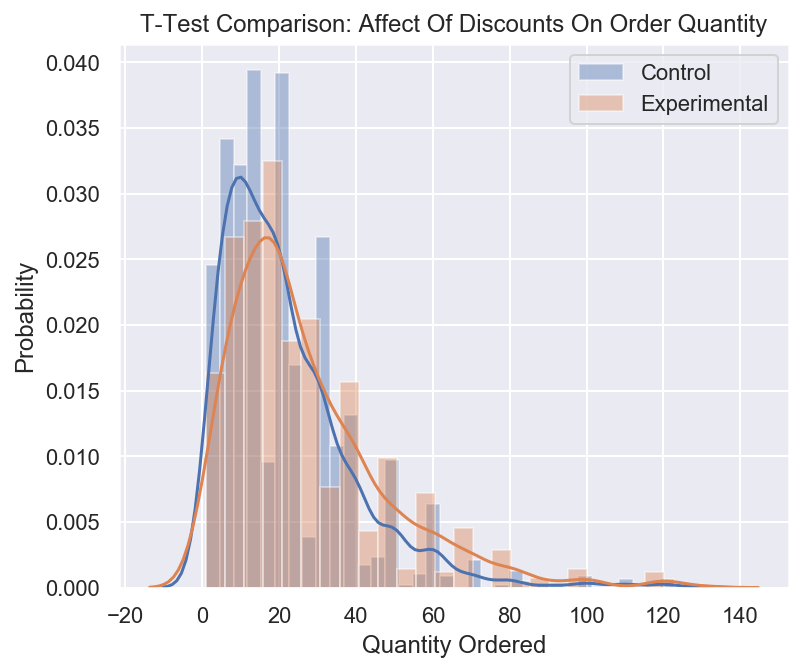

In [45]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(6,5)})
sns.distplot(control)
sns.distplot(experimental)
plt.title('T-Test Comparison: Affect Of Discounts On Order Quantity',fontsize=12)
plt.xlabel('Quantity Ordered')
plt.ylabel('Probability')
plt.legend(['Control','Experimental'])

In [46]:
control.mean()

21.715261958997722

In [47]:
experimental.mean()

27.10978520286396

In [48]:
experimental.mean() - control.mean()

5.394523243866239

T-Test compares two sample means to determine if the sample means are statistically different.

In [49]:
stats.ttest_ind(experimental, control,equal_var=False)

Ttest_indResult(statistic=6.239069142123973, pvalue=5.65641429030433e-10)

The p-value is 5.656^-10, the probability of accepting H0, which is far less than the chosen alpha level of .05.

Therefore, we reject the null hypothesis. 

We see that there is a statistically significant difference between mean quantity with and without discounts.

In [50]:
a=df.groupby('Discount').count()
a

,Id,OrderId,ProductId,UnitPrice,Quantity
Discount,,,,,
0.00,1317,1317,1317,1317,1317
0.01,1,1,1,1,1
0.02,2,2,2,2,2
0.03,3,3,3,3,3
0.04,1,1,1,1,1
0.05,185,185,185,185,185
0.06,1,1,1,1,1
0.10,173,173,173,173,173
0.15,157,157,157,157,157


In [51]:
a.drop([.01,.02,.03,.04,.06],inplace=True)
a

,Id,OrderId,ProductId,UnitPrice,Quantity
Discount,,,,,
0.00,1317,1317,1317,1317,1317
0.05,185,185,185,185,185
0.10,173,173,173,173,173
0.15,157,157,157,157,157
0.20,161,161,161,161,161
0.25,154,154,154,154,154


In [52]:
X=[0,5,10,15,20,25]
y=[1317,185,173,157,161,154]

Text(0.5, 0, 'Discount Amount (Cents)')

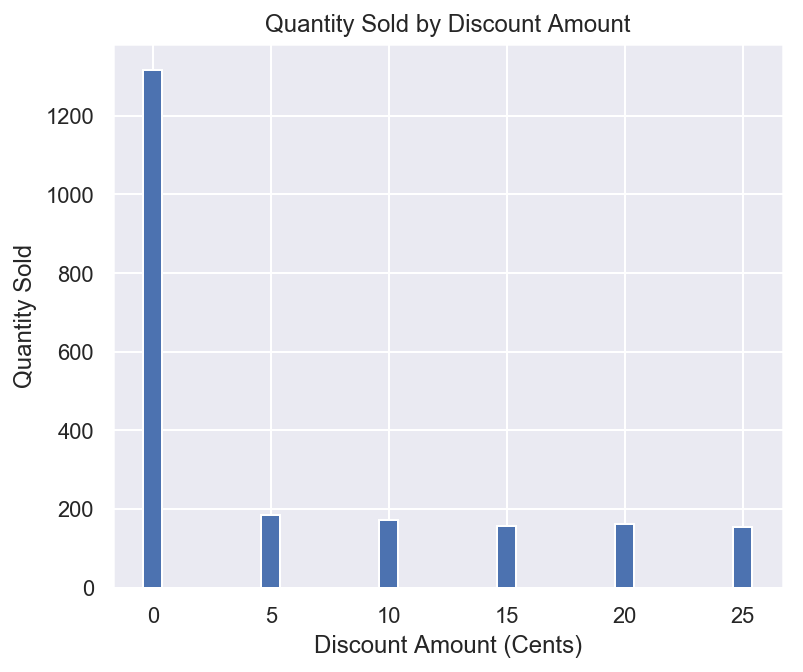

In [53]:
plt.bar(X,y)
plt.title('Quantity Sold by Discount Amount')
plt.ylabel('Quantity Sold')
plt.xlabel('Discount Amount (Cents)')

In [54]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'Quantity ~ C(Discount)'
lm = ols(formula, Discounts).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Discount),9.0,6354.890405,706.098934,1.647964,0.097673
Residual,828.0,354771.009356,428.467403,NaN,NaN


P-value is roughly 10% and exceeds our threshold of 5%. 

We fail to reject the null hypothesis.

There is no significant difference between discount amounts and quantity sold.

### We will assess 3 other meaningful tests to help the company.

### Additional Question #1: Does Average Order Size Differ By Month?

Null hypothesis (Ho): There is no difference in average order size by month.

Alternative hypothesis (Ha): There is a difference in average order size by month.

In [55]:
c.execute("""SELECT * FROM 'Order';
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

830


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil


In [56]:
df=df.groupby('ShippedDate').count()
df=df.loc[:,['ShippedDate','Id']]
df['ShippedDate']=df.index
df['Month'] = df.ShippedDate.apply(lambda x: x[5:7])
df=df.groupby('Month').count()

/Users/evanokin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [57]:
df['ShippedDate']=df.index
df=df.rename(columns={'ShippedDate':'Month','Id':'Total_Count'})
df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['Month']=df.index
df

,Month,Total_Count
Jan,Jan,39
Feb,Feb,37
Mar,Mar,39
Apr,Apr,40
May,May,23
Jun,Jun,18
Jul,Jul,27
Aug,Aug,32
Sep,Sep,33
Oct,Oct,35


Text(0, 0.5, 'Order Quantity')

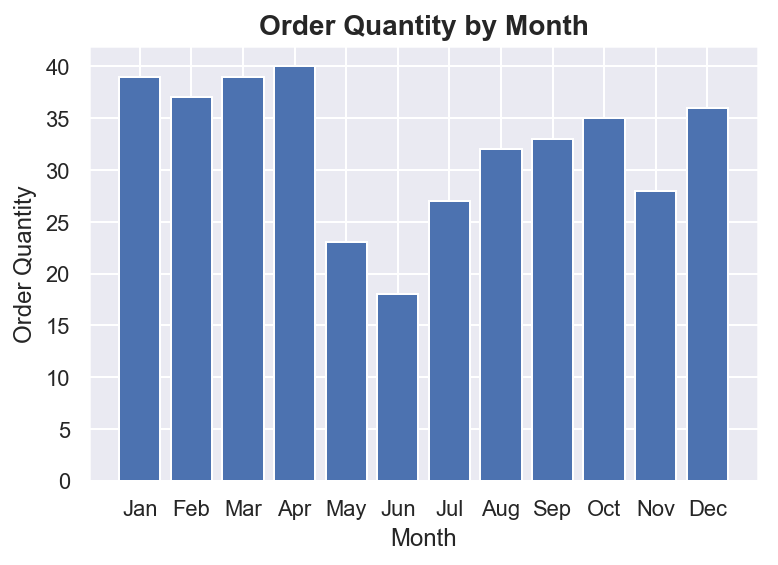

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df.index,df['Total_Count'])
plt.title('Order Quantity by Month',fontsize=14,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Order Quantity')

Observation shows some form of seasonality, with the majority of orders in early months (January through April)

In [59]:
c.execute("""SELECT * FROM 'Order';
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df=df.groupby('ShippedDate').count()
df=df.loc[:,['ShippedDate','Id']]
df['ShippedDate']=df.index
df['Month'] = df.ShippedDate.apply(lambda x: x[5:7])
df.head(3)

,ShippedDate,Id,Month
ShippedDate,,,
2012-07-10,2012-07-10,1,07
2012-07-11,2012-07-11,1,07
2012-07-12,2012-07-12,1,07


In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'Id ~ C(Month)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,34.039437,3.094494,2.080397,0.020923
Residual,375.0,557.795188,1.487454,NaN,NaN


The p-value is roughly 2%, the probability of accepting H0, which is less than the chosen alpha level of .05.

Therefore, we reject the null hypothesis. 

We see that there is a statistically significant difference between order quantity by month.

### Additional Question #2: Are Order Sizes Higher In European Countries Than The Rest Of the World?

Null hypothesis (Ho): There is no difference in order size by European country.

Alternative hypothesis (Ha): There is a difference in order size by European country.

In [61]:
c.execute("""SELECT * FROM 'Order';
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df=df.groupby('ShipCountry').count()
df=df.loc[:,['ShipCountry','Id']]
df['ShipCountry']=df.index
EuropeList=['Austria','Belgium']
#df['Europe'].npwhere(df.index is in EuropeList,1,0)
df['Europe']=[0,1,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,0]
df

,ShipCountry,Id,Europe
ShipCountry,,,
Argentina,Argentina,16,0
Austria,Austria,40,1
Belgium,Belgium,19,1
Brazil,Brazil,83,0
Canada,Canada,30,0
Denmark,Denmark,18,1
Finland,Finland,22,1
France,France,77,1
Germany,Germany,122,1


Text(0, 0.5, 'Order Quantity')

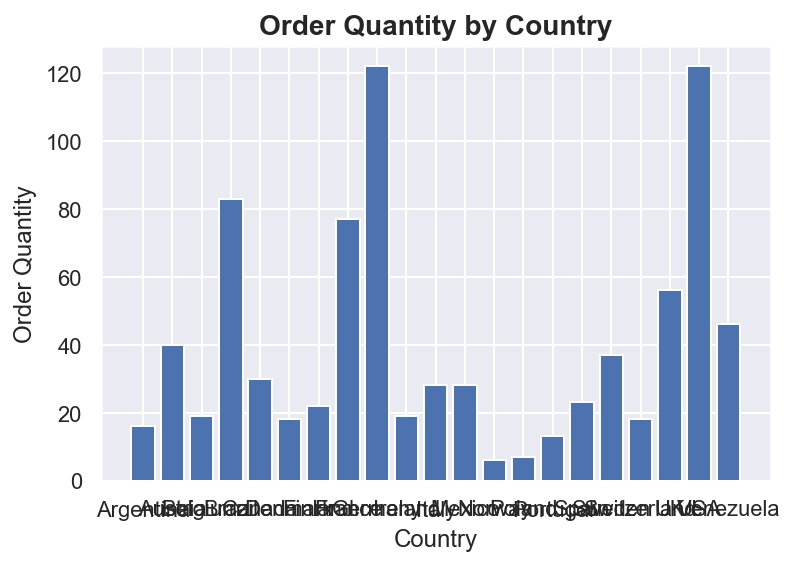

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df['ShipCountry'],df['Id'])
plt.title('Order Quantity by Country',fontsize=14,fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Order Quantity')

In [63]:
df_Europe=df.groupby('Europe').sum()
df_Europe.rename(columns={'Id':'Order Quantity'})
df_Europe.index=['Not Europe','Europe']
df_Europe

,Id
Not Europe,361
Europe,469


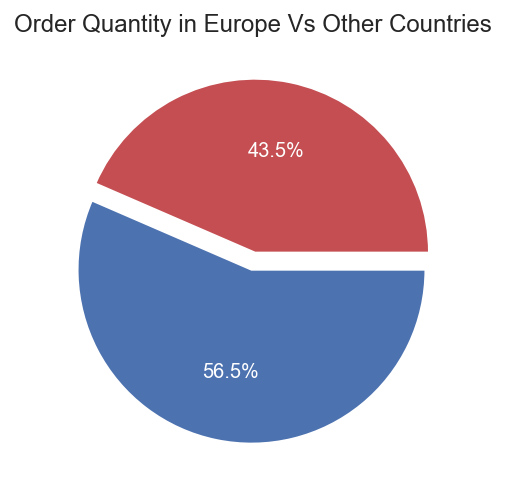

In [64]:
import matplotlib.pyplot as plt

count = [361,469]
colors = ['r','b']

plt.pie(count, labels = ['Not Europe','Europe'], colors=colors ,explode = (0.05, 0.05), autopct = '%1.1f%%',textprops={'color':"w"})
plt.title('Order Quantity in Europe Vs Other Countries')
plt.show()

In [65]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'Id ~ C(Europe)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Europe),1.0,405.440018,405.440018,0.335544,0.569217
Residual,19.0,22957.798077,1208.305162,NaN,NaN


P-value is very large and exceeds alpha of .05, and thus we do not reject the null hypothesis. 

We cannot say that European countries sell in higher quantity than all other (non-European) countries.

### Additional Question #3: Are Average Freight Costs Substantially Different By Shipping Company?

Null hypothesis (Ho): There is no difference in freight costs by shipping company.

Alternative hypothesis (Ha): There is a difference in freight costs by shipping company.

In [66]:
c.execute("""SELECT * FROM 'Order';
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

830


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil


In [67]:
df=df.groupby('ShipVia').mean()
df['ShipComp']=['SpeedyExpress','UnitedPackage','FederalShipping']
df=df.drop(columns={'Id','EmployeeId'})
df

,Freight,ShipComp
ShipVia,,
1,65.001325,SpeedyExpress
2,86.640644,UnitedPackage
3,80.441216,FederalShipping


Text(0, 0.5, 'Average Amount ($)')

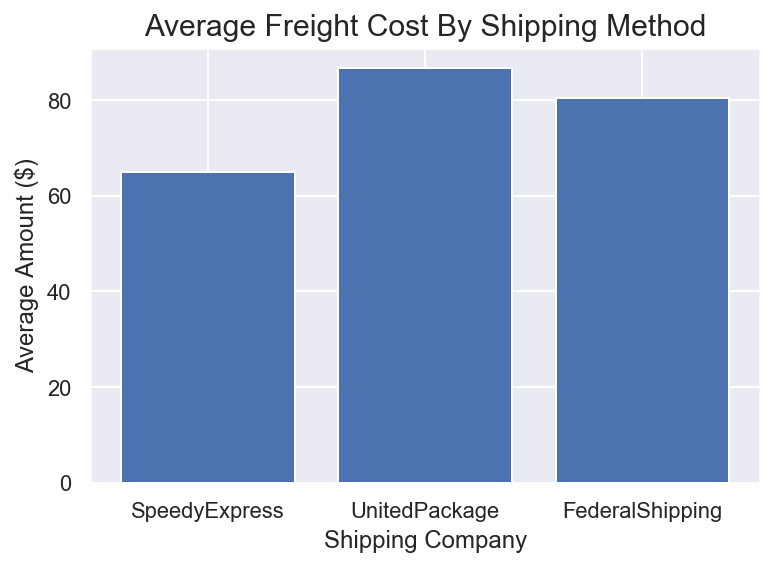

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df['ShipComp'],df['Freight'])
plt.title('Average Freight Cost By Shipping Method', fontsize=15)
plt.xlabel('Shipping Company')
plt.ylabel('Average Amount ($)')

In [69]:
c.execute("""SELECT * FROM 'Order';
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head(3)

from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'Freight ~ C(ShipVia)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

830


,df,sum_sq,mean_sq,F,PR(>F)
C(ShipVia),2.0,6.788200e+04,33941.001137,2.49781,0.082885
Residual,827.0,1.123753e+07,13588.301613,NaN,NaN


P-value is relatively close at .08 but exceeds alpha of .05, and thus we do not reject the null hypothesis. 

We cannot say that certain shipping companies are more costly than others, at a 5% confidence level.

### Conclusions

- There is a statistically significant difference between mean quantity with and without discounts.

- However, there is no significant difference between discount <b>amount</b> and quantity sold.

- There is a statistically significant difference between order quantity by month. Specifically, order quantity tends to be highest in January, February, March and April.

- There is no significant difference between quantity sold in European countries vs all other (non-European) countries.

- While it is "close", there is no significant difference between freight costs for the three different types of shipping companies (Speedy Express, United Package, Federal Shipping).